<a href="https://colab.research.google.com/github/dguhanus/VAE_CNN_mnist/blob/main/Emotion_Detection_from_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br>
Train a deep learning model on facial emotion detection<br>
Dataset from: https://www.kaggle.com/msambare/fer2013<br>


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32

In [10]:
train_data_dir='/content/drive/MyDrive/Facial_Emotion_dataset/train/'
validation_data_dir='/content/drive/MyDrive/Facial_Emotion_dataset/test/'

In [11]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

Found 327 images belonging to 7 classes.


In [14]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 136 images belonging to 7 classes.


erify our generator by plotting a few faces and printing corresponding labels

In [15]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [16]:
img, label = train_generator.__next__()

In [17]:
import random

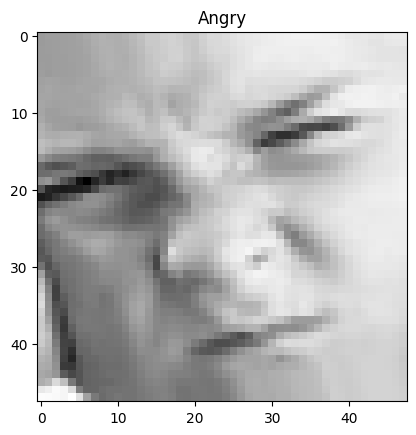

In [18]:
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()
##########################################################

#########################################################<br>
Create the model

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

In [21]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [23]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [24]:
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [25]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

In [26]:
model.add(Dense(7, activation='softmax'))

In [27]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [28]:
train_path = "/content/drive/MyDrive/Facial_Emotion_dataset/train/"
test_path = "/content/drive/MyDrive/Facial_Emotion_dataset/test"

In [29]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [30]:
epochs=50

In [31]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

Epoch 1/50
10/10 [==============================] - 84s 8s/step - loss: 1.9541 - accuracy: 0.1153 - val_loss: 1.9463 - val_accuracy: 0.1172
Epoch 2/50
10/10 [==============================] - 5s 459ms/step - loss: 1.9465 - accuracy: 0.1627 - val_loss: 1.9450 - val_accuracy: 0.1250
Epoch 3/50
10/10 [==============================] - 7s 652ms/step - loss: 1.9451 - accuracy: 0.1525 - val_loss: 1.9464 - val_accuracy: 0.1250
Epoch 4/50
10/10 [==============================] - 5s 537ms/step - loss: 1.9447 - accuracy: 0.1627 - val_loss: 1.9476 - val_accuracy: 0.1016
Epoch 5/50
10/10 [==============================] - 6s 540ms/step - loss: 1.9439 - accuracy: 0.1525 - val_loss: 1.9451 - val_accuracy: 0.1875
Epoch 6/50
10/10 [==============================] - 5s 461ms/step - loss: 1.9479 - accuracy: 0.1458 - val_loss: 1.9469 - val_accuracy: 0.1172
Epoch 7/50
10/10 [==============================] - 5s 531ms/step - loss: 1.9457 - accuracy: 0.1390 - val_loss: 1.9468 - val_accuracy: 0.1250
Epoch 8/

In [32]:
model.save('emotion_detection_model_100epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


lot the training and validation accuracy and loss at each epoch

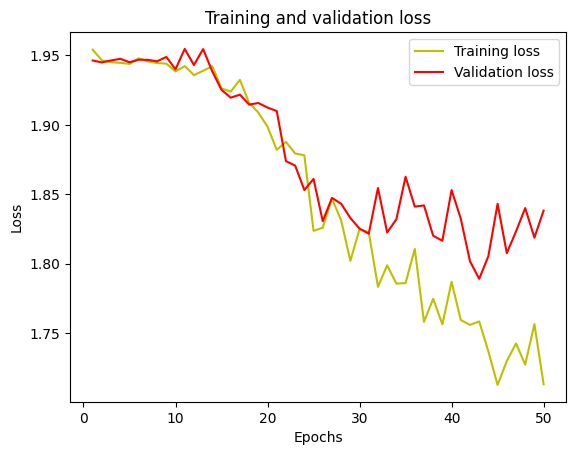

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

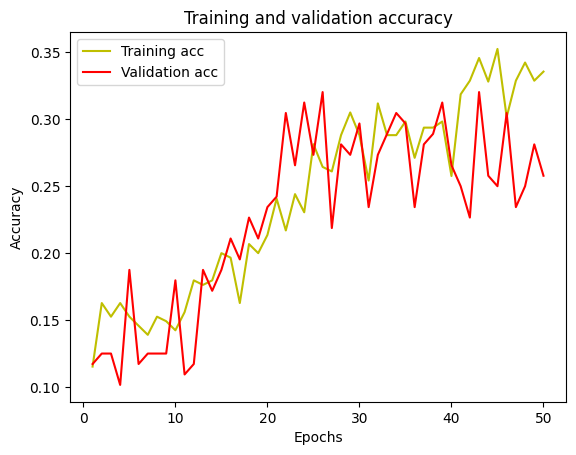

In [35]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##################################################################

In [36]:
from keras.models import load_model

est the model

In [37]:
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

enerate a batch of images

In [38]:
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

1/1 [==============================] - 0s 239ms/step


In [39]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [40]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.125


onfusion Matrix - verify accuracy of each class

In [41]:
from sklearn.metrics import confusion_matrix

<Axes: >

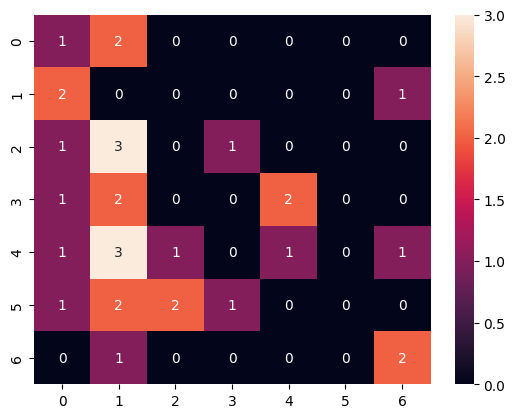

In [42]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

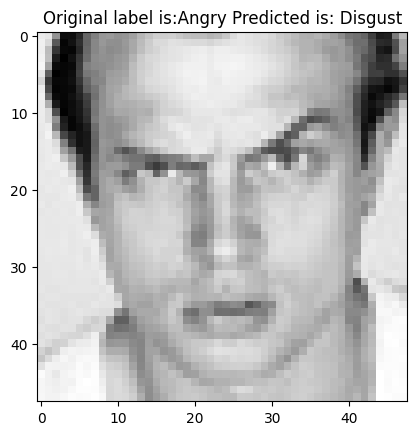

In [43]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()